## 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [1]:
import gensim
wv = gensim.models.KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin.gz', binary=True)

/home/yuki/anaconda3/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
print(wv["United_States"].shape)
wv["United_States"]

(300,)


array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [3]:
wv.similarity("United_States", "U.S.")

0.73107743

In [4]:
# 計算で求める
import numpy as np

def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))


united_states_v = wv["United_States"]
us_v = wv["U.S."]

cos_sim(united_states_v, us_v)

0.7310775

## 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [5]:
wv.most_similar("United_States", topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.7400725483894348),
 ('U.S.', 0.7310773730278015),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

## 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [6]:
wv.most_similar(positive=["Spain", "Athens"], negative=["Madrid"], topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400863289833069),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791338920593)]

In [7]:
new_v = wv["Spain"] - wv["Madrid"] + wv["Athens"]
wv.similar_by_vector(new_v, topn=10)

#この方法だと計算に使用した単語("Athens"も結果の中に入っている)

[('Athens', 0.7528455853462219),
 ('Greece', 0.6685471534729004),
 ('Aristeidis_Grigoriadis', 0.5495778322219849),
 ('Ioannis_Drymonakos', 0.5361457467079163),
 ('Greeks', 0.5351786017417908),
 ('Ioannis_Christou', 0.5330225825309753),
 ('Hrysopiyi_Devetzi', 0.5088489055633545),
 ('Iraklion', 0.5059264302253723),
 ('Greek', 0.5040615797042847),
 ('Athens_Greece', 0.5034108757972717)]

## 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．  
求めた単語と類似度は，各事例の末尾に追記せよ．

In [8]:
from tqdm import tqdm

# 単語アナロジーの評価データのダウンロード
with open("data/questions-words.txt", "r") as f:
    lines = f.readlines()

new_list = []
    
for line in tqdm(lines):
    if ":" in line:
        new_list.append(line)
        continue
    line = line.strip() # 改行削除
    word_list = line.split() #空白区切り
    similar_word, similarity = wv.most_similar(positive=[word_list[1], word_list[2]], negative=[word_list[0]], topn=1)[0]
    new_list.append(line+" "+similar_word+" "+str(similarity)+"\n")
    
with open("data/analogy.txt", "w") as wf:
    wf.writelines(new_list)

100%|██████████| 19558/19558 [44:26<00:00,  7.33it/s]


## 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

意味的アナロジー  
capital-common-countries, capital-world, currency, city-in-state, family  
文法的アナロジー	
gram1-adjective-to-adverb, gram2-opposite, gram3-comparative,  gram4-superlative, gram5-present-participle, gram6-nationality-adjective,  gram7-past-tense, gram8-plural, gram9-plural-verbs

In [9]:
with open("data/analogy.txt", "r") as f:
    lines = f.readlines()

sem = True # 意味的アナロジー
sem_acc = 0
syn_acc = 0
sem_sum = 0
syn_sum =0
for line in lines:
    if ":" in line:
        if "gram" in line:
            sem = False
        continue
    line_list = line.split()
    if sem:
        sem_sum += 1
        if line_list[3] == line_list[4]:
            sem_acc += 1
    else:
        syn_sum += 1
        if line_list[3] == line_list[4]:
            syn_acc += 1

print("意味的アナロジー正解率：{}%".format(round(sem_acc/sem_sum*100, 2)))    
print("文法的アナロジー正解率：{}%".format(round(syn_acc/syn_sum*100, 2))) 

意味的アナロジー正解率：73.09%
文法的アナロジー正解率：74.0%


## 66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

#combined.csv : 単語1, 単語2, 人間の類似度判定
#set1.csv , set2.csv: 単語1, 単語2, 人間の類似度判定(平均), 複数人による類似度判定

In [10]:
!head -10 data/wordsim353/combined.csv

In [11]:
with open("data/wordsim353/combined.csv", "r") as f:
    lines = f.readlines()

wv_sim = []
human_sim = []
for i, line in enumerate(lines):
    # header skip
    if i == 0:
        continue
    else:
        line_list = line.strip().split(",")
        wv_sim.append(wv.similarity(line_list[0], line_list[1]))
        human_sim.append(line_list[2])

from scipy.stats import spearmanr
print(spearmanr(wv_sim, human_sim))

SpearmanrResult(correlation=0.6849564489532376, pvalue=3.3287848950141535e-50)


## 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [12]:
# 国名リスト
# https://raw.githubusercontent.com/macks22/nsf-award-data/master/data/country-codes.tsv

In [13]:
!head -5 data/country-codes.tsv

English short name	Alpha-2 code	Alpha-3 code	Numeric
Afghanistan	AF	AFG	004
Åland Islands	AX	ALA	248
Albania	AL	ALB	008
Algeria	DZ	DZA	012


In [14]:
with open("data/country-codes.tsv", "r") as f:
    lines = f.readlines()

country_set = set()
country_wv = []
for i, line in enumerate(lines):
    if i == 0:
        continue
    line_list = line.strip().split()
    line_list[0] = line_list[0].replace(",", "").replace("-", "_")
    country_set.add(line_list[0]) # 集合に追加
    
country_list = list(country_set)
for country in country_list:
    try:
        country_wv.append(wv[country])
    #Google Newsデータセットに単語がないときはプリントする
    except:
        print(country)

In [15]:
from sklearn.cluster import KMeans

# fit_predict : 入力に対するクラスタ番号を出力する
cluster_label = KMeans(n_clusters=5, random_state=2021).fit_predict(country_wv)
print("入力に対するクラスタ番号")
print(cluster_label)

for k in range(5):
    print("クラスター：", k)
    for i, label in enumerate(cluster_label):
        if label == k:
            print(country_list[i], end=",")
    print()
    print("================================================================")

入力に対するクラスタ番号
[2 2 3 2 1 4 1 0 4 2 3 3 3 4 4 2 2 1 0 4 4 2 0 1 4 1 1 4 4 2 3 0 0 4 1 2 1
 2 1 0 2 4 1 3 1 4 1 4 4 4 1 0 0 2 0 3 1 1 2 1 1 1 0 3 1 2 2 3 0 2 2 1 4 0
 1 4 2 0 3 3 0 1 3 0 3 0 3 4 2 2 0 2 2 0 2 0 3 4 0 0 2 1 3 2 3 2 1 1 4 3 0
 0 3 4 2 1 2 1 2 4 0 0 0 4 4 3 3 1 4 3 4 3 1 2 0 4 2 3 1 4 3 3 2 0 2 2 2 2
 2 4 3 1 2 4 4 0 4 0 0 4 2 1 0 1 3 0 4 0 1 4 2 3 3 0 2 4 1 2 1 2 1 3 4 3 4
 2 2 1 4 4 3 1 3 2 1 1 3 0 2 1 3 2 4 3 1 0 4 4 4 1 3 2 3 2 2 3 0 2 0 2 0 0
 2 2 4 4 0 1 1 3 0 1 1]
クラスター： 0
Tuvalu,Malaysia,Saudi,Guam,Japan,Papua,Kiribati,Bangladesh,Oman,Australia,Philippines,India,Fiji,Thailand,Palau,Tonga,Macao,Singapore,Samoa,Maldives,Kuwait,Myanmar,China,Qatar,Brunei,Timor_Leste,Nepal,Nauru,Afghanistan,Lao,Vanuatu,Hong,Indonesia,Cambodia,Pakistan,Sri,Tokelau,Mongolia,Viet,Bahrain,Bhutan,Taiwan,Niue,
クラスター： 1
Iraq,Cook,Monaco,United,New,Antarctica,Jersey,Isle,Mayotte,Costa,Wallis,Vatican,Sierra,South,Northern,Côte,Bouvet,Western,Christmas,Solomon,Greenland,San,Jordan,Gibraltar,France

## 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．  
さらに，クラスタリング結果をデンドログラムとして可視化せよ．

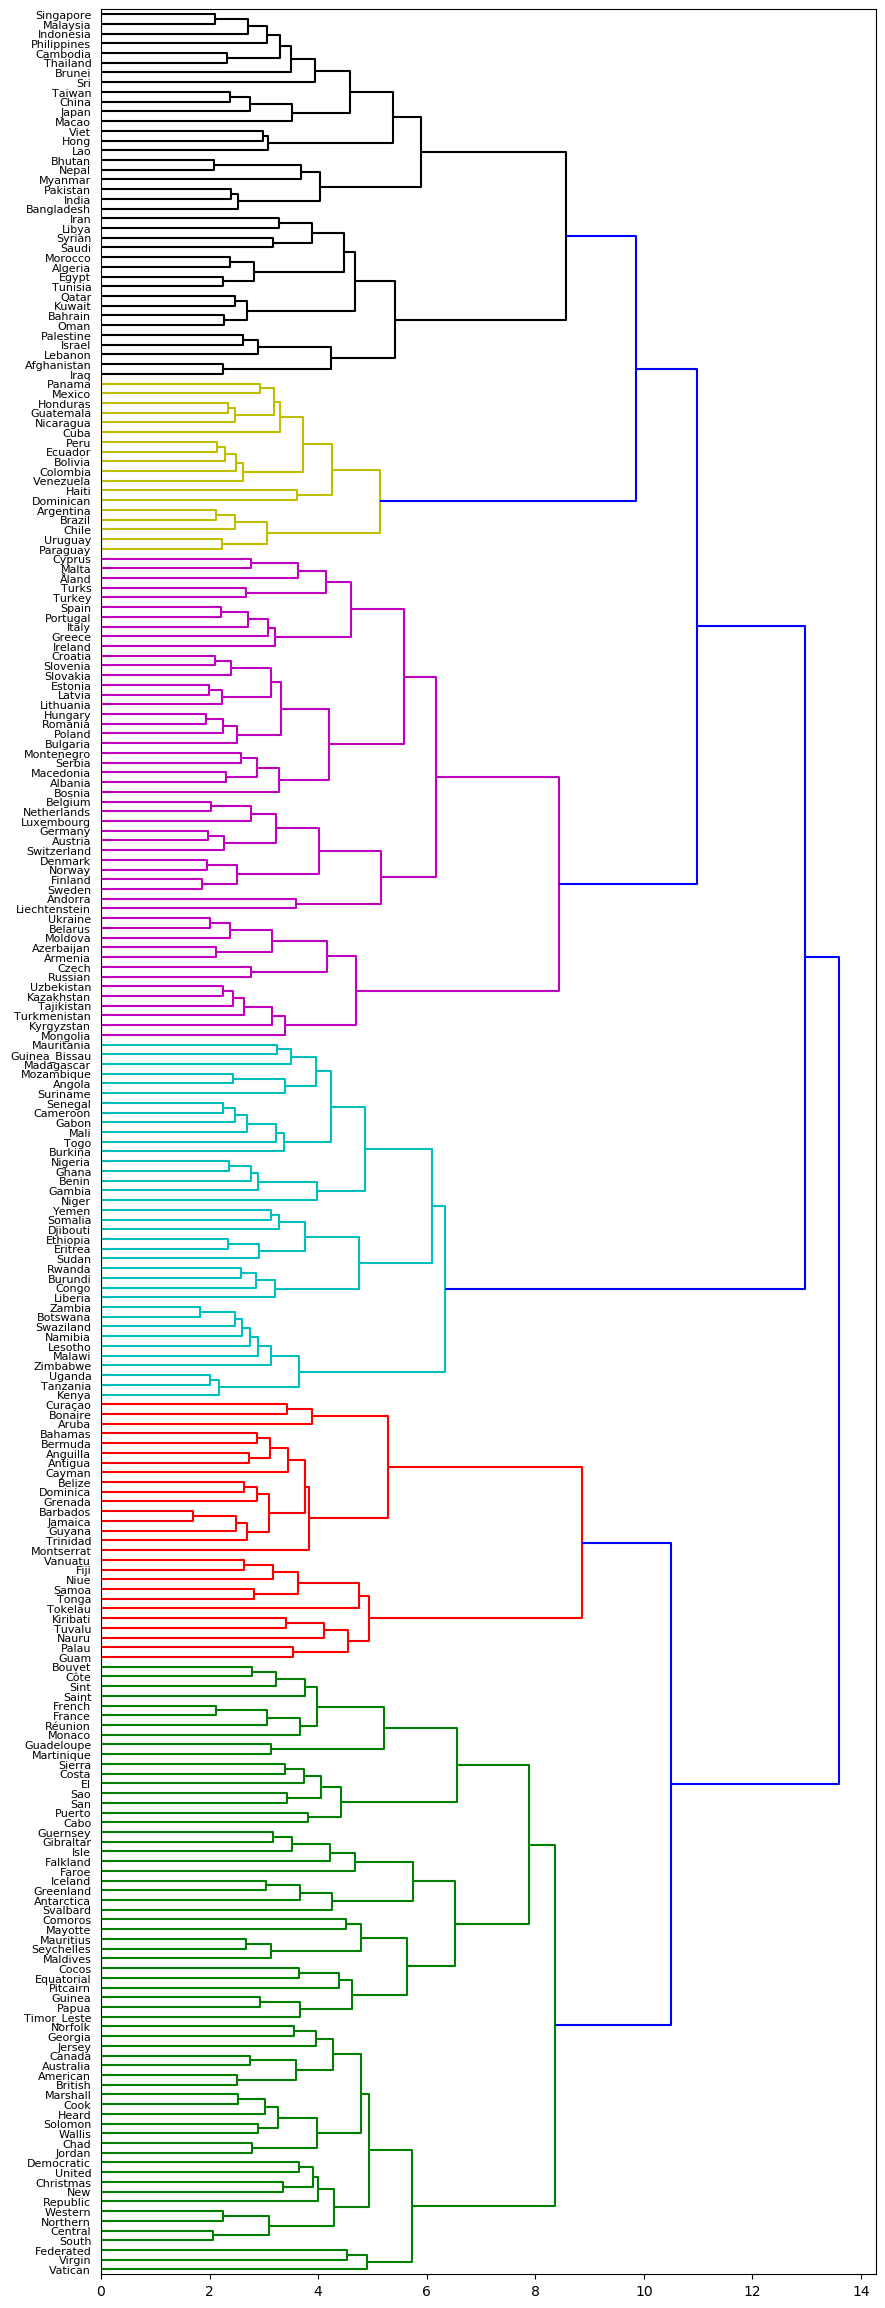

In [16]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
# dendrogram : 樹系図を描くモジュール
# linkage : 階層型クラスタリングを行うモジュール

clustered = linkage(country_wv, method='ward')
plt.figure(figsize=(10, 30), dpi=100)
dendrogram(clustered, labels=country_list, leaf_font_size=8, orientation='right') #右向き
plt.show()

## 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

t-SNEとは...  
- 高次元を圧縮して低次元にするアルゴリズム  
- 300次元の単語ベクトルを2次元に変換することで可視化が可能になる  
- 高次元空間におけるデータ同士の「近さ（類似度）」が、低次元空間におけるデータ同士の「近さ」に反映されるよう学習を行う

t_sne shape: (233, 2)


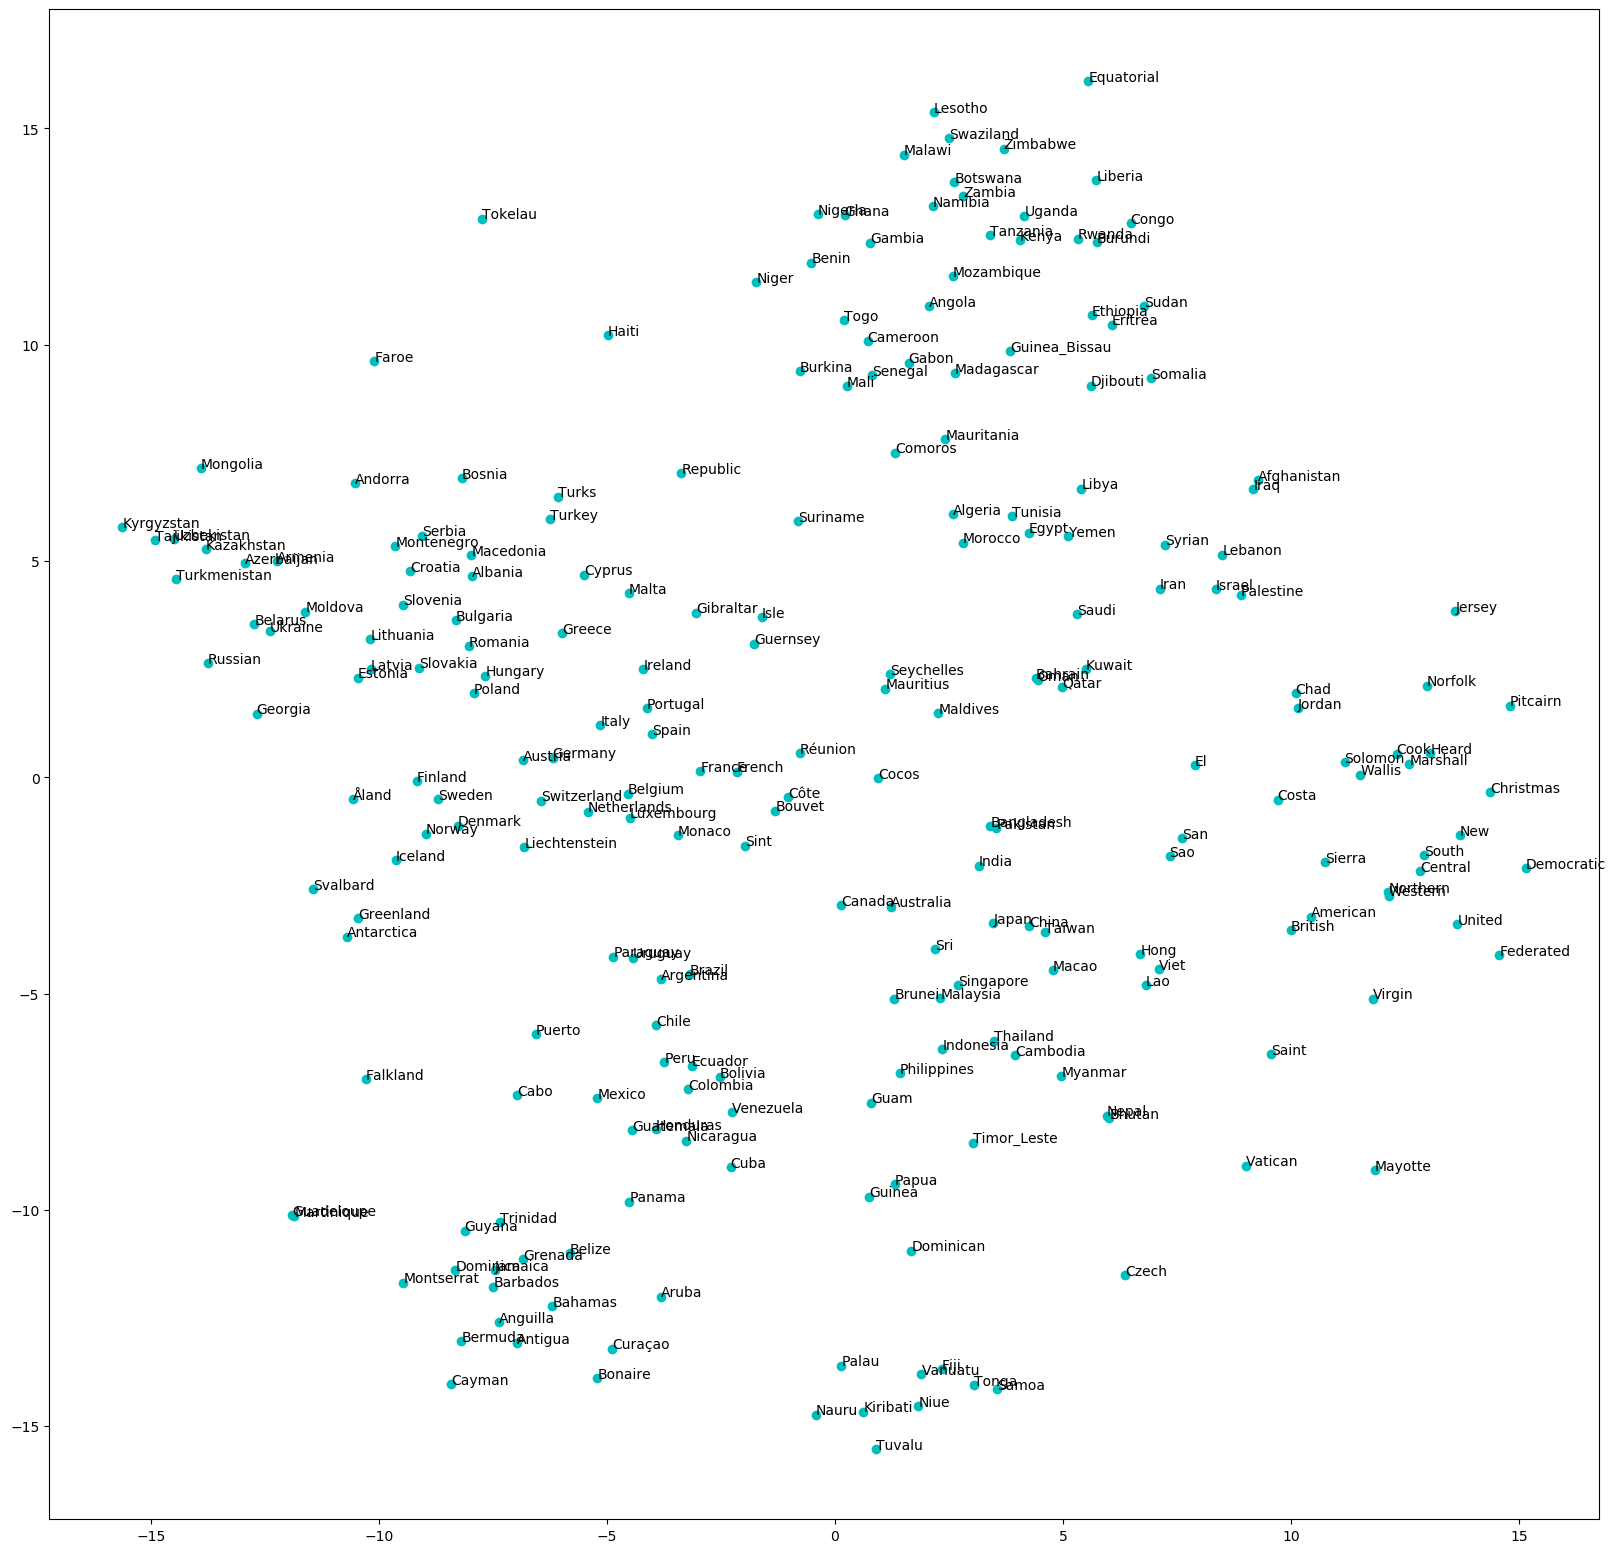

In [17]:
from sklearn.manifold import TSNE
import pandas as pd

# n_components : 圧縮したい次元数(default=2)
# fit_transform : 圧縮して出力の座標を返す
t_sne = TSNE(n_components=2).fit_transform(country_wv)
print('t_sne shape:', t_sne.shape)

plt.figure(figsize=(20, 20), dpi=100)

for i in range(t_sne.shape[0]):
    plt.scatter(t_sne[i][0], t_sne[i][1], marker='o', color="c")
    plt.annotate(country_list[i], xy=(t_sne[i][0], t_sne[i][1]))
plt.show()

５つにクラスタリングした単語を色分けして表示してみる

t_sne shape: (233, 2)


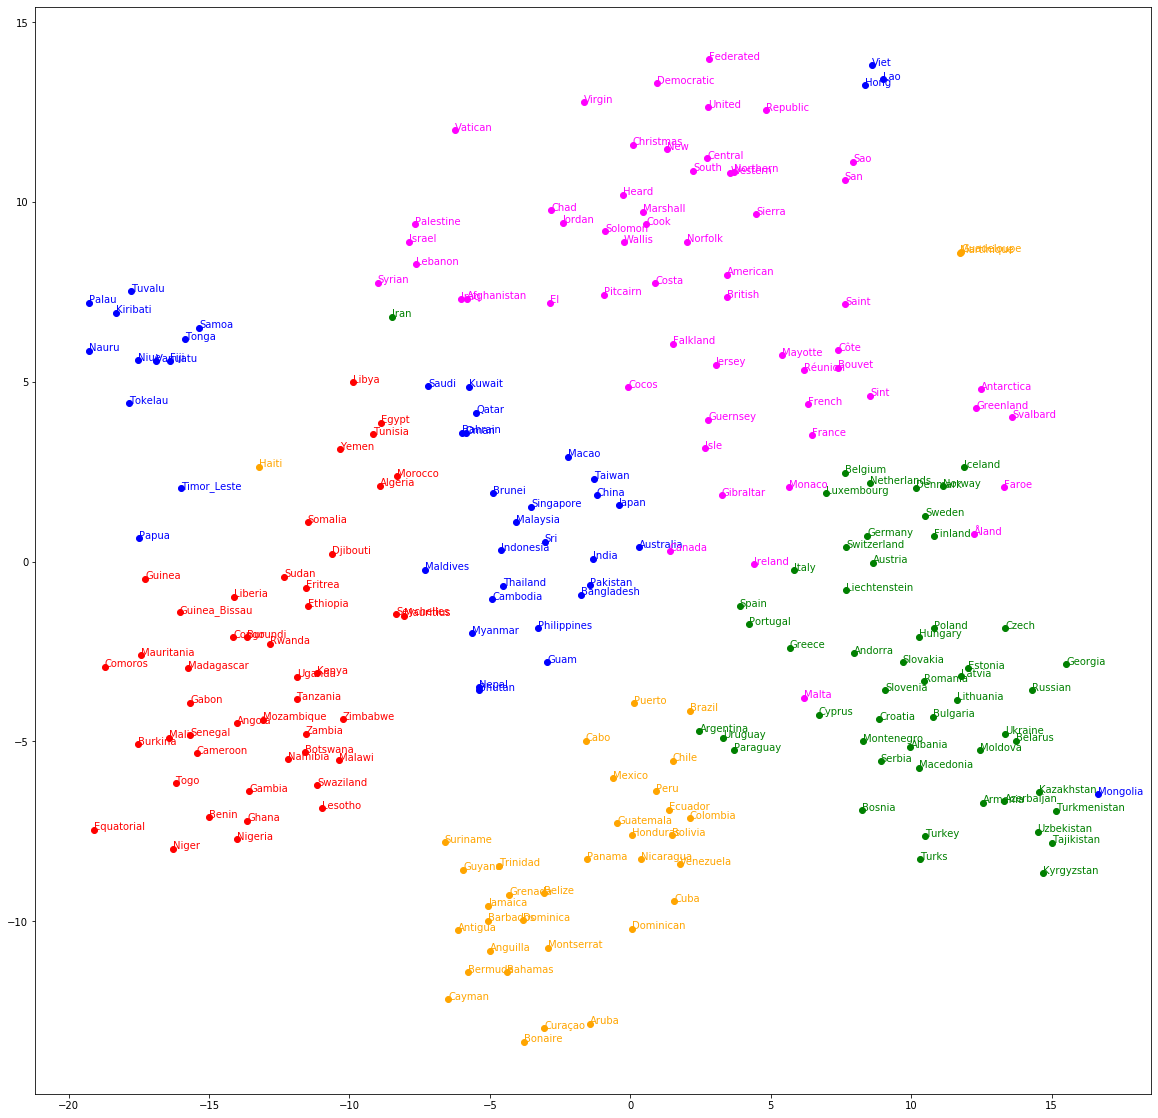

In [18]:
t_sne = TSNE(n_components=2).fit_transform(country_wv)
print('t_sne shape:', t_sne.shape)

# KMeansクラスタリング
cluster_label = KMeans(n_clusters=5).fit_predict(country_wv)

plt.figure(figsize=(20, 20))

# 表示する色を用意
color_list= ["red","green","blue", "orange","magenta"]
for i in range(t_sne.shape[0]):
    plt.scatter(t_sne[i][0], t_sne[i][1], marker='o', c=color_list[cluster_label[i]])
    plt.annotate(country_list[i], xy=(t_sne[i][0], t_sne[i][1]),  color=color_list[cluster_label[i]])
plt.show()